Global Minima:
Coordinates: [0. 0.]
Function Value: 0.0


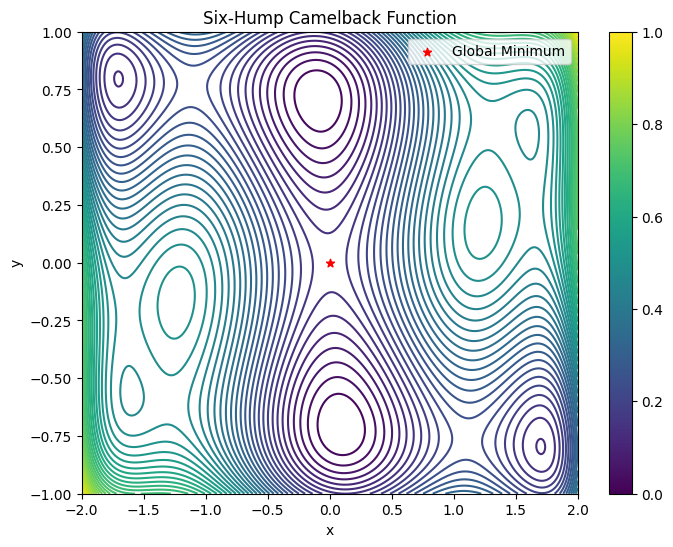

In [2]:
# exercise 9 PART ONE. 2D minimization of a six-hump camelback function


import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib

# Define the six-hump camelback function
def six_hump_camelback(x):
    term1 = (4 - 2.1 * pow(x[0], 2) + pow(x[0], 4) / 3) * pow(x[0], 2)
    term2 = x[0] * x[1]
    term3 = (4 * pow(x[1], 2) - 4) * pow(x[1], 2)
    return term1 + term2 + term3

# Set bounds for variables
bounds = [(-2, 2), (-1, 1)]

# Find the global minima using scipy.optimize.minimize
initial_guess = [0, 0]
result = minimize(six_hump_camelback, x0=initial_guess, bounds=bounds)

# Display the results
print("Global Minima:")
print("Coordinates:", result.x)
print("Function Value:", result.fun)

# Generate a meshgrid for visualization
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = six_hump_camelback([X, Y])

# Plot the function
plt.figure(figsize=(8, 6))
contour_levels = np.linspace(Z.min(), Z.max(), 50)
plt.contour(X, Y, Z, levels=contour_levels, cmap='viridis')
x_min, y_min = result.x[0], result.x[1]
plt.scatter(x_min, y_min, color='red', marker='*', label='Global Minimum')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Six-Hump Camelback Function')
plt.legend()
plt.colorbar()
plt.show()

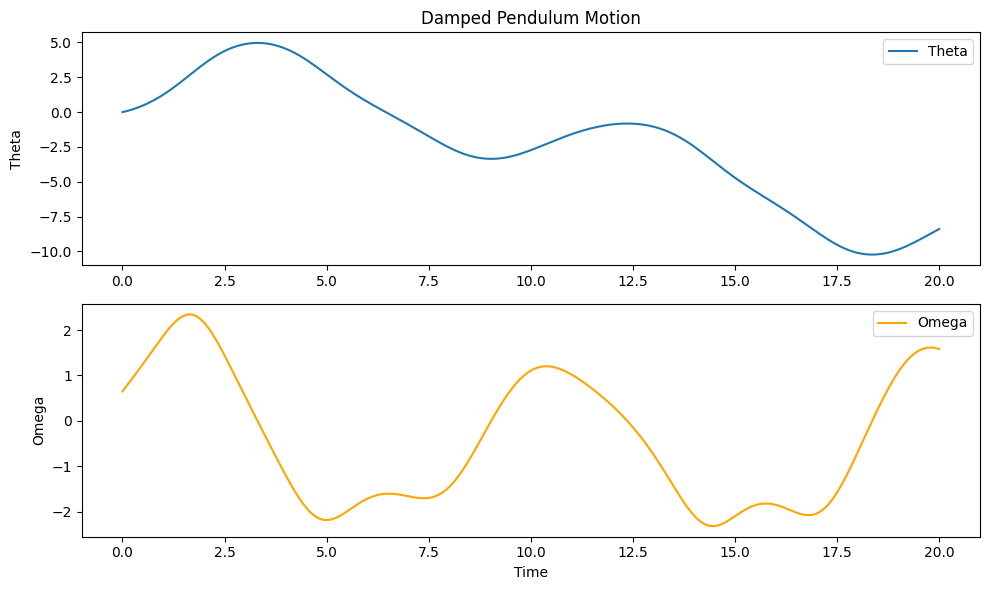

In [4]:
# exerciese 9 PART.TWO.Non-linear ODE: the damped pendulum


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib

# Function representing the damped pendulum ODE
def damped_pendulum(y, t, Q, g, l, d, Omega):
    theta, omega = y
    dydt = [
        omega,
        -1 / Q * omega + (g / l) * np.sin(theta) + d * np.cos(Omega * t)
    ]
    return dydt

# Parameters
l = 10.0  # length of the pendulum
Q = 2.0   # damping factor
d = 1.5   # forcing amplitude
Omega = 0.65  # driving frequency
g = 9.8   # acceleration due to gravity

# Initial conditions
theta0 = 0.0
omega0 = 0.65

# Time grid
t = np.linspace(0, 20, 200)

# Solve the ODE using odeint
initial_conditions = [theta0, omega0]
parameters = (Q, g, l, d, Omega)
solution = odeint(damped_pendulum, initial_conditions, t, args=parameters)

# Extracting theta and omega from the solution
theta = solution[:, 0]
omega = solution[:, 1]

# Plotting
plt.figure(figsize=(10, 6))

# Plot of theta as a function of time
plt.subplot(2, 1, 1)
plt.plot(t, theta, label='Theta')
plt.title('Damped Pendulum Motion')
plt.ylabel('Theta')
plt.legend()

# Plot of omega as a function of time
plt.subplot(2, 1, 2)
plt.plot(t, omega, label='Omega', color='orange')
plt.xlabel('Time')
plt.ylabel('Omega')
plt.legend()

plt.tight_layout()
plt.show()

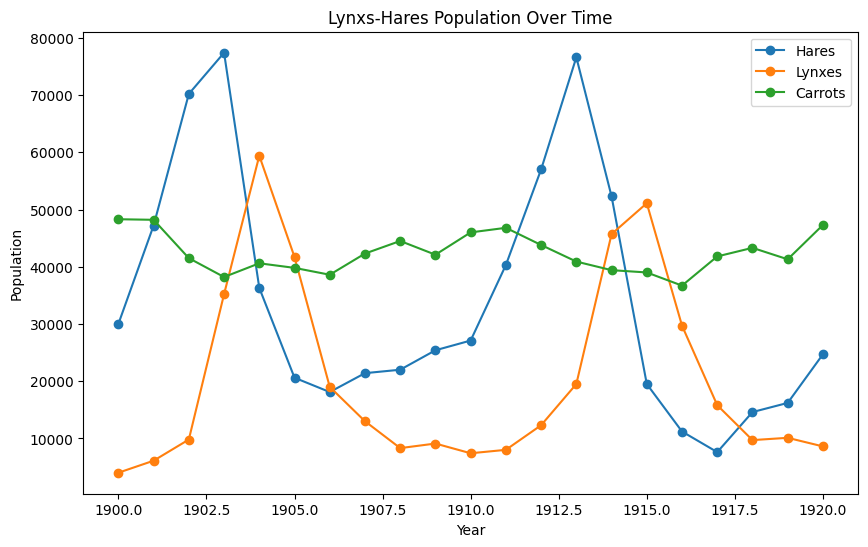

In [6]:
# exercise 9 PART THREE.FFT of a simple dataset


import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Load the lynxs-hares dataset
data_path = "populations.txt"
data = np.loadtxt(data_path, unpack=True)
years, hares, lynxes, carrots = data

# Plot the populations over the years
plt.figure(figsize=(10, 6))
plt.plot(years, hares, label='Hares', marker='o')
plt.plot(years, lynxes, label='Lynxes', marker='o')
plt.plot(years, carrots, label='Carrots', marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Lynxs-Hares Population Over Time')
plt.legend()
plt.show()

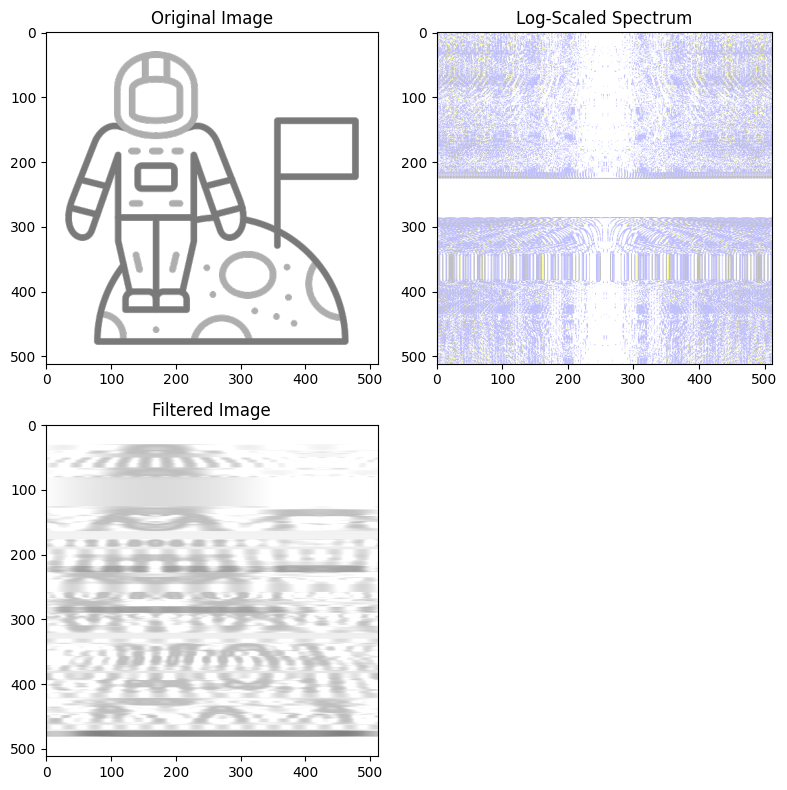

In [7]:
# exercise 9.PART FOUR.FFT of an image


import matplotlib.pyplot as plt
from scipy import fftpack
import numpy as np
import matplotlib

# Import the image as a 2D numpy array
image = plt.imread("moonlanding.png")

# Display the original image
plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Perform 2D FFT of the image
fft_image = fftpack.fft2(image)

# Calculate the magnitude of the FFT
magnitude = np.abs(fft_image)

# Shift the zero-frequency component to the center
magnitude_shifted = np.fft.fftshift(magnitude)

# Plot the log-scaled spectrum using the already log-transformed data
plt.subplot(222)
# Calculate the logarithmically scaled magnitude spectrum
log_scaled_magnitude = np.log1p(magnitude_shifted)

# Set the color map to grayscale
color_map = 'gray'

# Automatically adjust the aspect ratio
aspect_ratio = 'auto'

# Display the image
plt.imshow(log_scaled_magnitude, cmap=color_map, aspect=aspect_ratio)
plt.title('Log-Scaled Spectrum')

# Identify signal and noise regions in the spectrum
threshold = 100
signal_mask = magnitude > threshold
noise_mask = ~signal_mask

# Set noise regions to zero in the FFT
filtered_fft_image = fft_image.copy()
filtered_fft_image[noise_mask] = 0

# Perform inverse FFT to reconstruct the filtered image
filtered_image = fftpack.ifft2(filtered_fft_image)
filtered_image = np.real(filtered_image)

# Display the filtered image
plt.subplot(223)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')

plt.tight_layout()
plt.show()